# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE
* The dataset contains a series of images that can be used to solve the Happy House problem!
* We need to build an artificial neural network that can detect smiling faces.
* Only smiling people will be allowed to enter the house!
* The train set has 600 examples. The test set has 150 examples.
* **Data Source: https://www.kaggle.com/iarunava/happy-house-dataset

![image.png](attachment:image.png)

# STEP #2 Import libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import random 
import h5py 

# STEP #3 Importing Data 

In [2]:
filename = 'train_happy.h5'
f = h5py.File(filename, 'r')

In [3]:
for key in f.keys():
    print(key)

list_classes
train_set_x
train_set_y


In [4]:
happy_training = h5py.File('train_happy.h5','r')
happy_testing = h5py.File('test_happy.h5','r')

In [5]:
X_train = np.array(happy_training['train_set_x'][:])
y_train = np.array(happy_training['train_set_y'][:])

X_test = np.array(happy_testing['test_set_x'][:])
y_test = np.array(happy_testing['test_set_y'][:])

In [6]:
X_train.shape

(600, 64, 64, 3)

In [7]:
X_test.shape

(150, 64, 64, 3)

In [8]:
y_train.shape

(600,)

In [9]:
y_test.shape

(150,)

# Step #4 Visualization of the dataset 

1


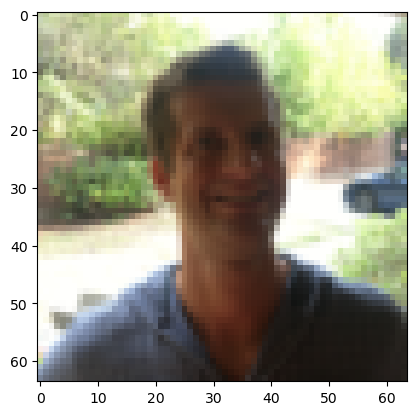

In [10]:

i = random.randint(1,600)


plt.imshow(X_train[i]);
print(y_train[i])

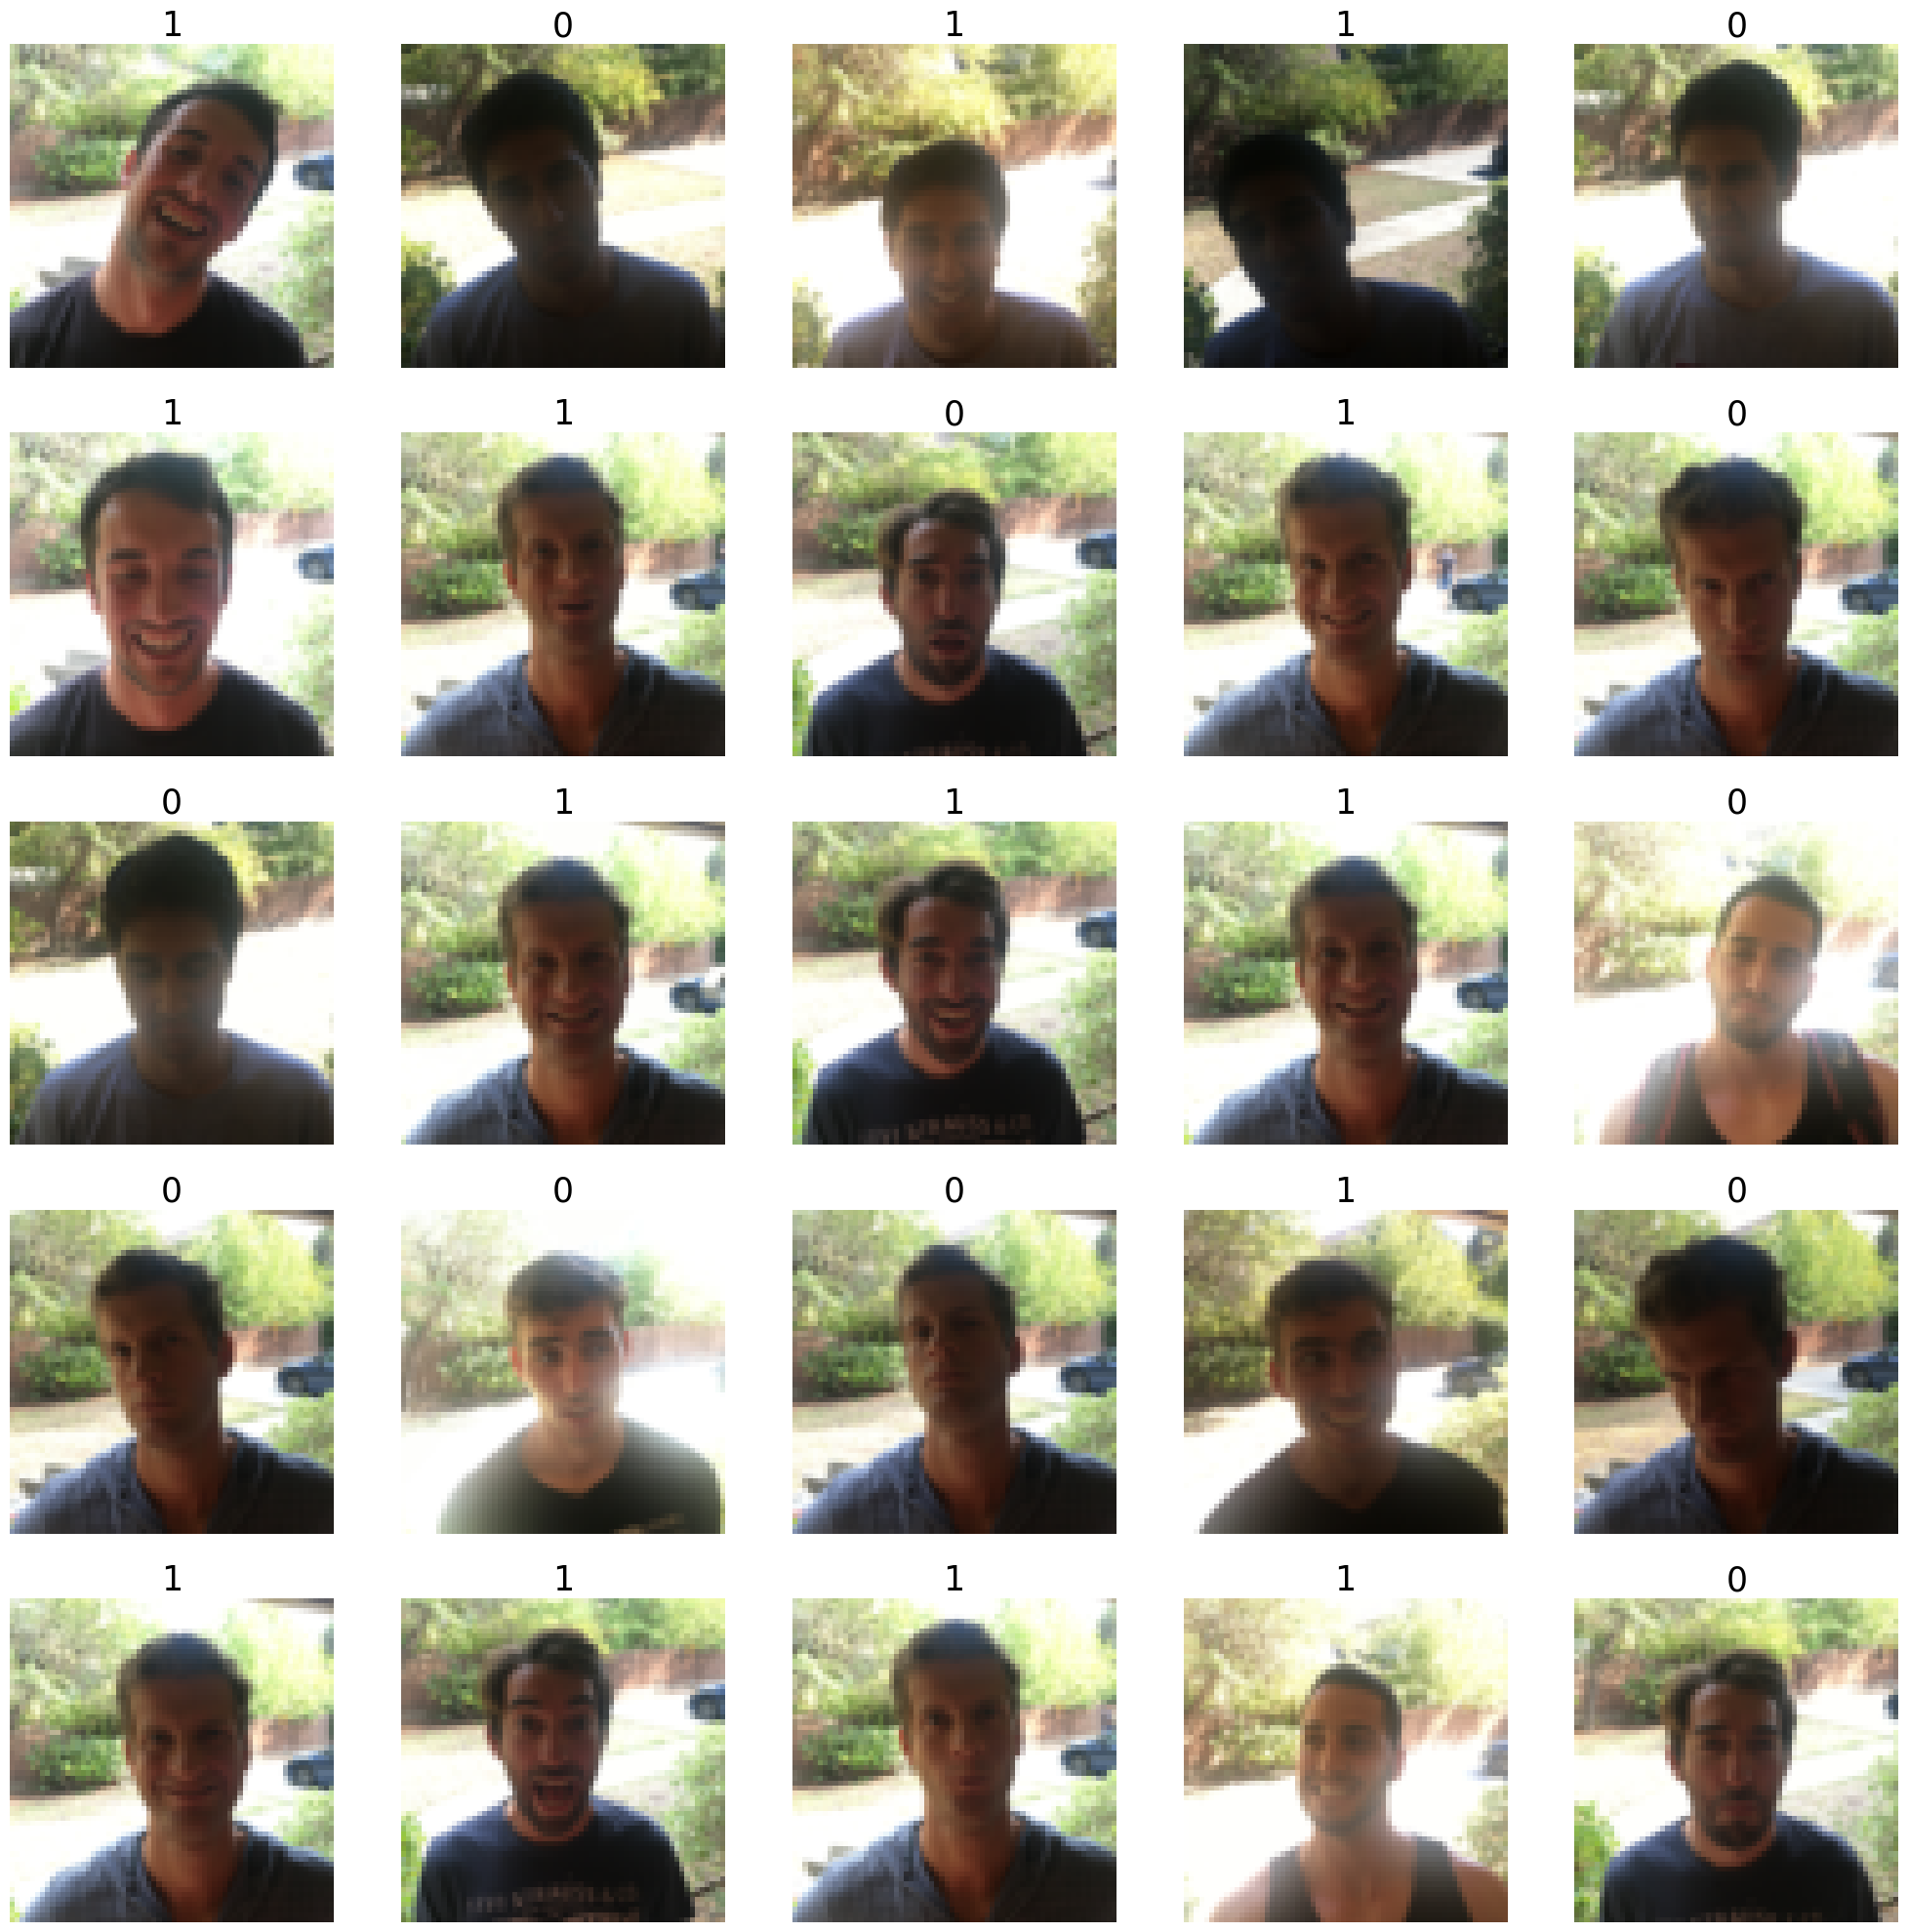

In [11]:
W_grid = 5
L_grid = 5

n_training = len(X_train)

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))

axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')


# Step #5Training the Model 

In [12]:
X_train = X_train/255
X_test = X_test/255

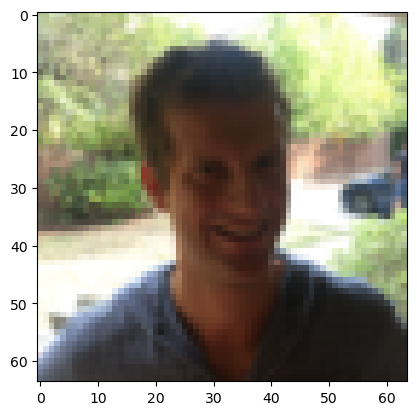

In [13]:
plt.imshow(X_train[9])

* Sequential: Initializes a linear stack of layers.
* Conv2D: Extracts features from the input using convolutional filters.
* MaxPooling2D: Reduces the spatial dimensions of the input, retaining essential features.
* Flatten: Converts 2D data into a 1D vector for input to fully connected layers.
* Dense: Fully connected layer, where each neuron is connected to all neurons in the previous layer.
* Dropout: Prevents overfitting by randomly setting a fraction of the input units to 0.
* Adam: Optimizer that adapts the learning rate during training.
* TensorBoard: Callback for real-time monitoring of training metrics.


In [14]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [15]:
# Initialize a sequential model, which allows stacking layers in a linear order
cnn_model = Sequential()

# Add a 2D convolutional layer with 64 filters, 6x6 kernel size, and ReLU activation function
# input_shape specifies the input dimensions (64x64 pixels with 3 color channels, RGB)
cnn_model.add(Conv2D(64, (6, 6), input_shape=(64, 64, 3), activation='relu'))

# Add a max-pooling layer to reduce the spatial dimensions (height and width) by taking the maximum value in a 2x2 window
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting by randomly setting 20% of the input units to 0 during training
cnn_model.add(Dropout(0.2))

# Add another 2D convolutional layer with 64 filters, 5x5 kernel size, and ReLU activation function
cnn_model.add(Conv2D(64, (5, 5), activation='relu'))

# Add another max-pooling layer to further reduce the spatial dimensions by taking the maximum value in a 2x2 window
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers to create a 1D vector, preparing it for the fully connected layers
cnn_model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation function
cnn_model.add(Dense(128, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function
# The sigmoid function is often used for binary classification, outputting a probability between 0 and 1
cnn_model.add(Dense(1, activation='sigmoid'))


/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn_model.compile(
    loss='binary_crossentropy',  # Specifies the loss function to be minimized. 'binary_crossentropy' is used for binary classification tasks where the output is either 0 or 1.
    optimizer=Adam(learning_rate=0.001),    # Specifies the optimizer to adjust the model's weights during training. Adam is a popular optimizer that adapts the learning rate during training. The initial learning rate is set to 0.001.
    metrics=['accuracy']         # Specifies the metrics to monitor during training and evaluation. 'accuracy' measures the percentage of correct predictions out of all predictions.
)


In [41]:
# Number of epochs for training the model
epochs = 10

# Train the model using the training data
history = cnn_model.fit(
    X_train,                  # Input data for training
    y_train,                  # Labels for the training data
    batch_size=30,            # Number of samples per gradient update
    epochs=epochs,            # Number of epochs to train the model
    verbose=1                 # Verbosity mode (1 = progress bar, 0 = silent)
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9564 - loss: 0.1226
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9273 - loss: 0.1697
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9737 - loss: 0.0994
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9684 - loss: 0.1339
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9686 - loss: 0.0835
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9591 - loss: 0.1017
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9684 - loss: 0.0848
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9705 - loss: 0.0935
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9749 - loss: 0.0808
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9833 - loss: 0.0796


# STEP #6 Evaluating the Model 

In [42]:
# Predict the class probabilities for the test data
predictions = cnn_model.predict(X_test)

# Convert the predicted probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [43]:
predicted_classes

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

<Axes: >

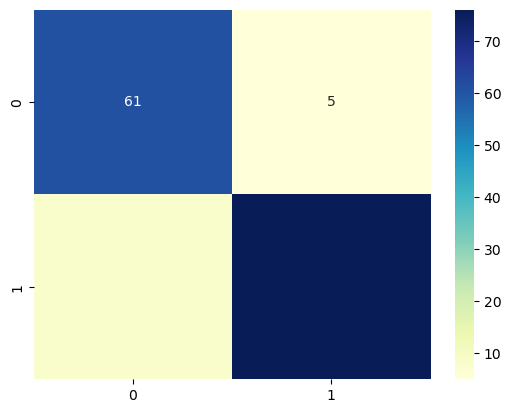

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=1, linecolor='black')


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        66
           1       0.94      0.90      0.92        84

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



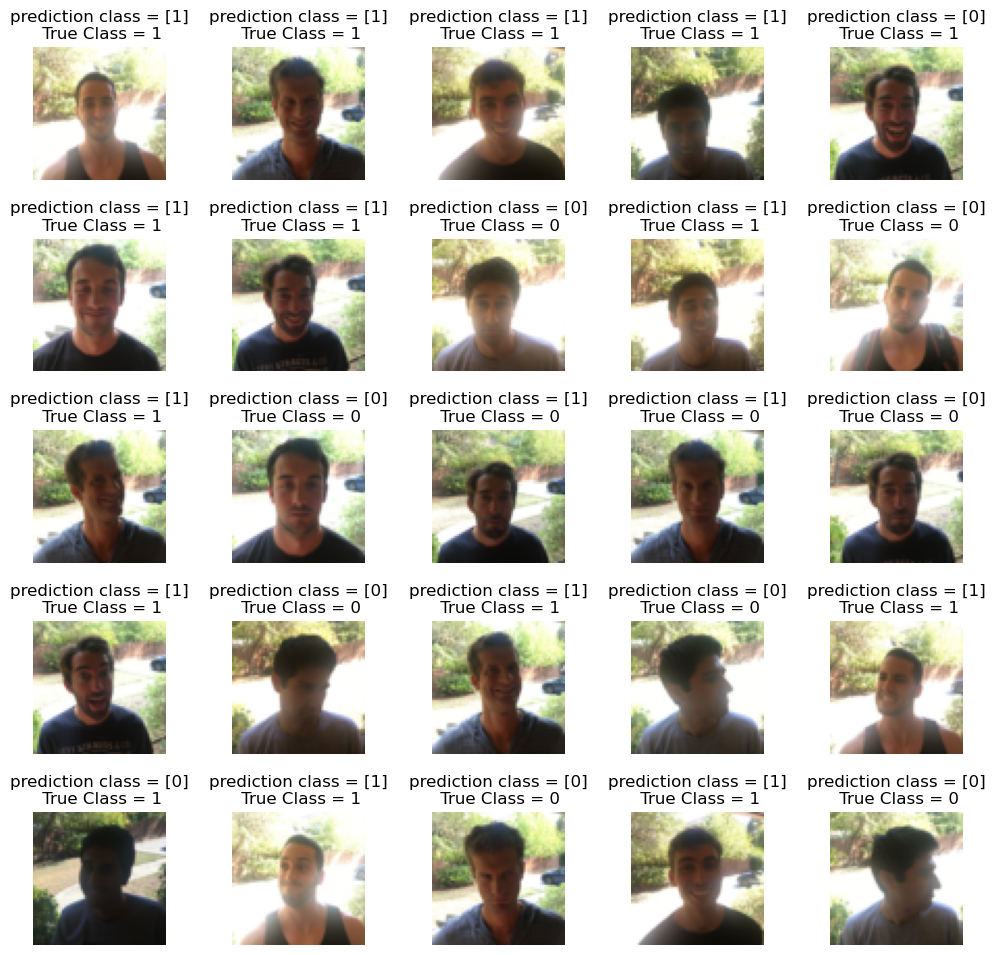

In [46]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))

axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction class = {}\n True Class = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)

# **END** 